<h1> DS200A Computer Vision Assignment</h1>

<h2>  Part Two: Exploratory data analysis and feature extraction. </h2>	


<h5> In this section, Compute at least 15 such image features (a method for each), including the following (NOTE: At least 10 of these must be scalar features and 2 matrix-based features): (i) image size, (ii) average of the red-channel intensity, (iii) aspectratio. This will require significant explatoratory research and data analysis. The first one is already implemented for you, and the next two are pre-specified. Additional requirements specfied in pdf. </h5>

In [1]:
%store -r starting_data
%store -r validation_data
import numpy as np
import cv2
import skimage
import matplotlib as plt
import copy
%matplotlib inline

In [2]:
bear = starting_data[starting_data['Encoding'] == 1]

In [3]:
bear.shape

(68, 3)

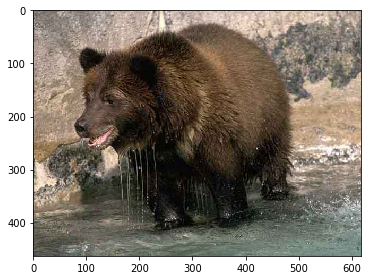

In [11]:
filename = skimage.io.imshow(bear['Image'].iloc[11])

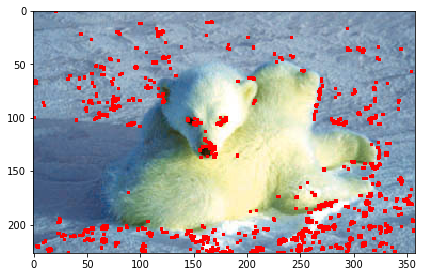

In [43]:
skimage.io.imshow(a)

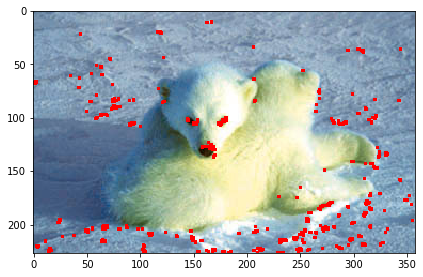

In [47]:
skimage.io.imshow(a)

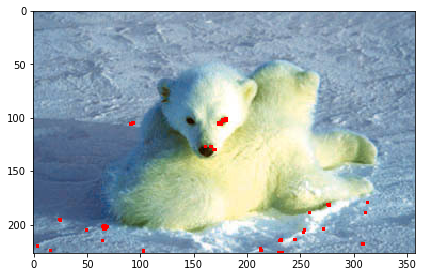

In [51]:
skimage.io.imshow(a)

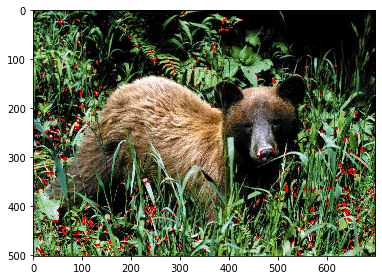

In [56]:
skimage.io.imshow(a)

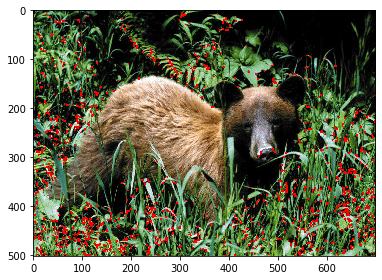

In [69]:
skimage.io.imshow(a)

In [10]:

sift = cv2.xfeatures2d.SIFT_create()
kp = sift.detect(gray,None)

In [20]:
import copy
a = copy.copy(bear['Image'].iloc[11])

In [21]:
img = a[:, :, ::-1] # convert image from RGB (skimage) to BGR (opencv)

In [22]:
gray = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
sift = cv2.xfeatures2d.SIFT_create()
kp = sift.detect(gray,None)

In [23]:
img=cv2.drawKeypoints(gray,kp,img)

TypeError: Layout of the output array outImage is incompatible with cv::Mat (step[ndims-1] != elemsize or step[1] != elemsize*nchannels)

In [96]:
corners

array([[[250, 394]],

       [[422, 261]],

       [[216, 352]],

       [[206, 376]],

       [[430, 383]],

       [[200, 294]],

       [[112, 250]],

       [[188, 264]],

       [[586, 354]],

       [[ 43, 324]],

       [[227, 231]],

       [[522, 360]],

       [[102, 446]],

       [[529, 285]],

       [[269, 392]],

       [[133, 262]],

       [[534, 362]],

       [[118, 242]],

       [[122, 255]],

       [[466, 341]],

       [[459, 318]],

       [[ 65, 416]],

       [[ 76, 325]],

       [[599, 341]],

       [[ 10, 359]]])

In [95]:
for i in corners:
    x,y = i.ravel()
    print(img[x][y])

[40 56 69]
[ 91 102 100]
[58 78 96]
[41 65 87]
[74 87 79]
[36 50 69]
[ 81 104 126]
[31 42 56]


IndexError: index 586 is out of bounds for axis 0 with size 463

In [90]:
img.shape

(502, 699, 3)

In [89]:
corners

array([[[643, 326]],

       [[459, 297]],

       [[ 89, 239]],

       [[667, 286]],

       [[243, 404]],

       [[ 30, 211]],

       [[235, 414]],

       [[631, 412]],

       [[ 76, 235]],

       [[509, 299]],

       [[640, 392]],

       [[659, 210]],

       [[235, 350]],

       [[567, 407]],

       [[129, 172]],

       [[ 65, 446]],

       [[515, 291]],

       [[  7, 286]],

       [[392,  15]],

       [[680, 217]],

       [[546, 420]],

       [[104, 432]],

       [[ 61,  21]],

       [[ 47, 244]],

       [[189, 465]]])

In [68]:
import cv2

gray = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)

gray = np.float32(gray)
dst = cv2.cornerHarris(gray,2,3,0.04)

#result is dilated for marking the corners, not important
dst = cv2.dilate(dst,None)

# Threshold for an optimal value, it may vary depending on the image.
img[dst>0.03*dst.max()]=[0,0,255]

In [72]:
img.shape

(502, 699, 3)

In [73]:
dst

array([[-2.61434961e+04,  1.36214609e+04,  1.05847203e+05,
         1.05847203e+05,  2.46885031e+05,  2.75363938e+05,
         2.75363938e+05,  7.87117688e+05,  7.87117688e+05,
         1.36665600e+06,  5.98557300e+06,  8.31883350e+06,
         8.31883350e+06,  8.31883350e+06,  4.75176150e+06,
         8.66612875e+05,  1.89233809e+04,  1.89233809e+04,
         1.89233809e+04, -3.72617656e+04, -1.23949188e+05,
        -9.76852125e+05, -3.31369850e+06, -5.70333400e+06,
        -5.70514950e+06, -7.27139100e+06, -5.70032450e+06,
        -1.99355000e+05,  1.40653950e+06,  1.40653950e+06,
         3.69561800e+06,  6.90966900e+06,  6.90966900e+06,
         6.90966900e+06,  1.59455175e+06,  5.12777650e+06,
         1.50244530e+07,  1.50244530e+07,  1.50244530e+07,
         6.81159700e+06,  1.14067012e+06,  1.14067012e+06,
         4.25497852e+04,  1.41505844e+05,  1.41505844e+05,
         4.23030750e+05,  6.80871000e+05,  6.80871000e+05,
         6.80871000e+05,  3.91206188e+05,  3.73774961e+0

In [2]:
#image size
def ft0(image):
    return image.size

#average of the red-channel intensity
def ft1(image):
    return np.mean(image[:,:,0])
    
#aspectratio
def ft1(image):
    return image.shape[0] / image.shape[1]

#average of the green-channel intensity
def ft3(image):
    return np.mean(image[:,:,1])

#average of the blue-channel intensity
def ft4(image):
    return np.mean(image[:,:,2])

#Harris Corner Detector, return an array contain Corner score for each pixel
def ft5(image):
    bgr_img = image[:, :, ::-1] # RGB -> BGR
    gray = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
    gray = np.float32(gray)
    dst = cv2.cornerHarris(gray,2,3,0.04)

    #result is dilated for marking the corners, not important
    dst = cv2.dilate(dst,None)
    return dst

#Shi-Tomasi Corner Detector & Good Features to Track
def ft6(image):
    bgr_img = image[:, :, ::-1] # RGB -> BGR

def ft7(image):
    raise notImplementedError()

def ft8(image):
    raise notImplementedError()

def ft9(image):
    raise notImplementedError()

def ft9(image):
    raise notImplementedError()
    
def ft10(image):
    raise notImplementedError()
    
def ft11(image):
    raise notImplementedError()
    
def ft12(image):
    raise notImplementedError()
    
def ft13(image):
    raise notImplementedError()
    
def ft14(image):
    raise notImplementedError()
    
def ft15(image):
    raise notImplementedError()
    
    
#Returns the aspect ratio of the image


 We expect all external sources sited, and significant indication of EDA. 

<h4> Graphs </h4>

<h4> Sources </h4>

<h4> DataFrame Creation </h4>

In [1]:
def feature_frame(df):
    return df
    #Returns data-frame with all the features now inside, and calculated


In [2]:
feature_frame(data_from_nb1)

NameError: name 'data_from_nb1' is not defined